In [11]:
#|default_exp app

In [12]:
#|export
from fastai.vision.all import *
import gradio as gr

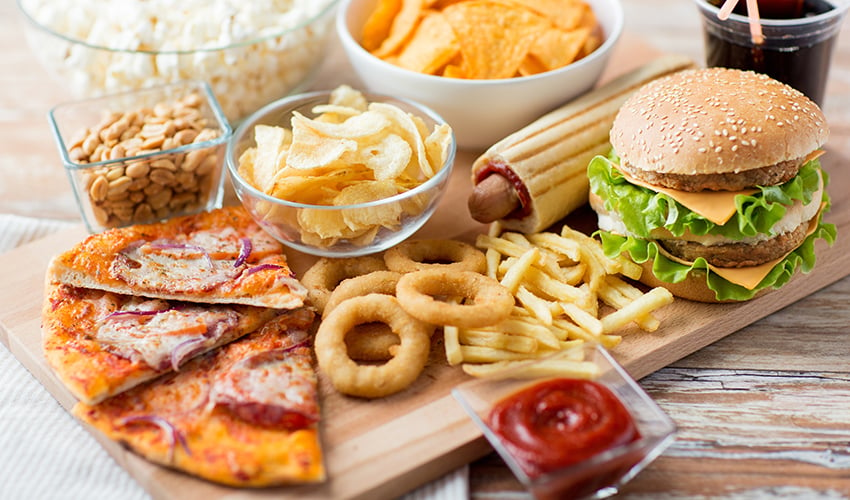

In [13]:
im = PILImage.create('fastfood.jpg')
im

In [14]:
#|export
learn = load_learner('export.pkl')

In [15]:
learn.predict(im)

('junk', tensor(1), tensor([0.0015, 0.9985]))

In [16]:
#|export
categories = ('Healthy', 'Junk')

def classify_image(img):
    pred, idx, probs = learn.predict(img)
    return dict(zip(categories, map(float, probs)))

In [17]:
classify_image(im)

{'Healthy': 0.001476562931202352, 'Junk': 0.9985234141349792}

In [18]:
#|export
image = gr.inputs.Image(shape=(192,192))
label = gr.outputs.Label()
examples = ['hf2.jpg', 'hf3.jpg', 'hf4.jpg', 'jf2.jpg', 'jf3.jpg', 'jf4.jpg','jf5.jpg']

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

/home/vinyi/mambaforge/envs/myenv/lib/python3.11/site-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/home/vinyi/mambaforge/envs/myenv/lib/python3.11/site-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/home/vinyi/mambaforge/envs/myenv/lib/python3.11/site-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/home/vinyi/mambaforge/envs/myenv/lib/python3.11/site-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


In [19]:
import nbdev
nbdev.export.nb_export('app.ipynb')
print('Export successful')

Export successful
